In [102]:
'''

Extract the stock market data from Yahoo finance for a set of any 15 companies of
four different sectors during 01.04.2017 to 31.03.2020. 

Make use of the following attributes on the data:
 Highest price of the day
 Minimum price of the day
 Opening price of the day
 Closing Price of the day

Take the average of these four attributes as an average movement of the day.

Now apply k-Means clustering to cluster the chosen 15 companies as per their respective sectors.

Write a brief summary (50-70 words) of your clustering
results.

'''

'\n\nExtract the stock market data from Yahoo finance for a set of any 15 companies of\nfour different sectors during 01.04.2017 to 31.03.2020. \n\nMake use of the following attributes on the data:\n\uf0b7 Highest price of the day\n\uf0b7 Minimum price of the day\n\uf0b7 Opening price of the day\n\uf0b7 Closing Price of the day\n\nTake the average of these four attributes as an average movement of the day.\n\nNow apply k-Means clustering to cluster the chosen 15 companies as per their respective sectors.\n\nWrite a brief summary (50-70 words) of your clustering\nresults.\n\n'

In [103]:
#pip install yfinance

In [104]:
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Intel':'INTC',
    'IBM':'IBM',
    'Microsoft':'MSFT',
    'Toyota':'TM',
    'Honda':'HMC',
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'MasterCard':'MA',
    'American Express':'AXP'
}

In [105]:
import yfinance as yf
start_date = '2017-04-01'
end_date = '2020-03-31'


df = yf.download(list(companies_dict.values()),start_date,end_date)
companies_dict.values()

[*********************100%%**********************]  17 of 17 completed


dict_values(['AMZN', 'AAPL', 'INTC', 'IBM', 'MSFT', 'TM', 'HMC', 'XOM', 'CVX', 'VLO', 'F', 'BAC', 'PEP', 'KO', 'JNJ', 'MA', 'AXP'])

In [106]:
import numpy as np

stock_open = np.array(df['Open']).T
stock_close = np.array(df['Close']).T
stock_high = np.array(df['High']).T
stock_low = np.array(df['Low']).T

print(stock_open)
print(stock_close)
print(stock_high)
print(stock_low)

[[ 35.92750168  35.8125      36.05500031 ...  61.63000107  63.1875
   62.68500137]
 [ 44.40000153  44.57500076  45.54100037 ...  95.09999847  96.54299927
   96.14150238]
 [ 79.16999817  78.48999786  78.58999634 ...  92.23999786  87.94000244
   88.51000214]
 ...
 [108.62000275 108.05999756 107.02999878 ... 122.01999664 125.09999847
  124.41999817]
 [ 66.58999634  65.75        66.12000275 ...  40.93999863  42.70999908
   42.79000092]
 [ 82.01999664  82.09999847  82.84999847 ...  37.5         37.13000107
   36.22999954]]
[[ 35.92499924  36.19250107  36.00500107 ...  64.61000061  61.93500137
   63.70249939]
 [ 44.57550049  45.34149933  45.4640007  ...  97.77449799  95.00499725
   98.19750214]
 [ 78.58999634  78.26000214  77.76000214 ...  93.29000092  88.73000336
   90.26999664]
 ...
 [108.51999664 108.01000214 106.13999939 ... 126.33999634 127.23999786
  125.22000122]
 [ 66.23000336  65.80999756  65.08999634 ...  45.59999847  45.04000092
   47.18999863]
 [ 82.06999969  82.37000275  82.5299

In [107]:
avg_movement =  (stock_open + stock_close + stock_high + stock_low) / 4 
print(avg_movement)


[[ 35.91125011  36.00500011  36.09437561 ...  63.125       62.71312523
   63.15437508]
 [ 44.48025036  44.96437454  45.61800003 ...  96.29087448  95.88337517
   97.15937614]
 [ 78.72749901  78.37750053  78.26000023 ...  94.01499939  88.61500168
   88.8599987 ]
 ...
 [108.46250153 108.07250023 106.56499863 ... 124.2349968  126.64999962
  124.48250008]
 [ 66.26749992  65.80750084  65.72749901 ...  43.45499897  44.31000042
   44.61499977]
 [ 81.93749809  82.05500031  82.85000038 ...  38.15000057  36.99000072
   36.93500042]]


In [108]:
for i in range(len(companies_dict)):
 print('company:{}, Change:{}'.format(df['High'].columns[i],avg_movement[i]))

company:AAPL, Change:[35.91125011 36.00500011 36.09437561 35.99499989 35.90749931 35.84687519
 35.49875069 35.40999985 35.39937592 35.37874985 35.35999966 35.31312466
 35.48375034 35.57750034 35.89187431 36.07562447 36.00812531 35.94874954
 35.95687485 36.49000072 36.87374878 36.52562523 36.625      36.96624947
 37.79812431 38.51187515 38.30875015 38.29874992 38.86812496 38.96312428
 38.88687515 38.00812626 38.01749992 38.31562519 38.46750069 38.55687428
 38.37624931 38.43624973 38.44750023 38.42812443 38.32999992 38.24374962
 38.58562469 38.51124954 38.6212492  38.80312443 38.76124954 37.83625031
 36.23499966 36.64687443 36.5        35.89375019 35.796875   36.27500057
 36.4806242  36.37937546 36.45125008 36.4800005  36.66562557 36.15749931
 36.22437572 35.98750019 36.07562542 36.04875088 35.95562458 35.72875023
 35.92062378 36.15562439 36.28062534 36.41312504 36.70000076 37.10437489
 37.36562538 37.38000011 37.67937469 37.73562527 37.47375107 37.81312466
 38.1362505  38.36250019 37.85

In [109]:
from sklearn.preprocessing import Normalizer

#Normalize the data
normalizer = Normalizer()
norm_movements = normalizer.fit_transform(avg_movement) 
print(norm_movements)

[[0.0261043  0.02617245 0.02623742 ... 0.04588629 0.04558689 0.04590764]
 [0.02030624 0.02052725 0.02082564 ... 0.04395895 0.04377292 0.04435544]
 [0.02736532 0.02724366 0.02720282 ... 0.03267919 0.03080217 0.03088733]
 ...
 [0.03145814 0.03134502 0.03090779 ... 0.03603274 0.03673318 0.03610453]
 [0.02741769 0.02722737 0.02719427 ... 0.01797918 0.01833293 0.01845913]
 [0.03891473 0.03897054 0.03934811 ... 0.01811865 0.01756773 0.01754161]]


In [110]:
from sklearn.cluster import KMeans
kmeas=KMeans(n_clusters=4).fit(norm_movements)
labels=kmeas.predict(norm_movements)

/Users/divesh.gandhi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [111]:
from sklearn.metrics import davies_bouldin_score
db={}
for k in range (2, 15):
    kmeas=KMeans(n_clusters=k).fit(norm_movements)
    labels=kmeas.predict(norm_movements)
    db[k]=davies_bouldin_score(norm_movements,labels)

/Users/divesh.gandhi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/divesh.gandhi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/divesh.gandhi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/divesh.gandhi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

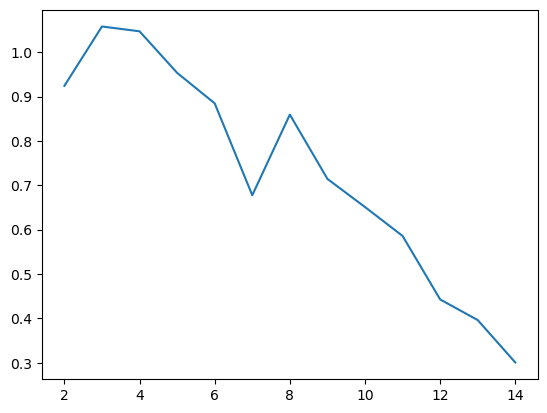

In [112]:
import matplotlib.pyplot as plt
plt.plot(list(db.keys()), list(db.values()))
# Pick k = 3 , 4 , or 8 based on DB score

/Users/divesh.gandhi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/divesh.gandhi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/divesh.gandhi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/divesh.gandhi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

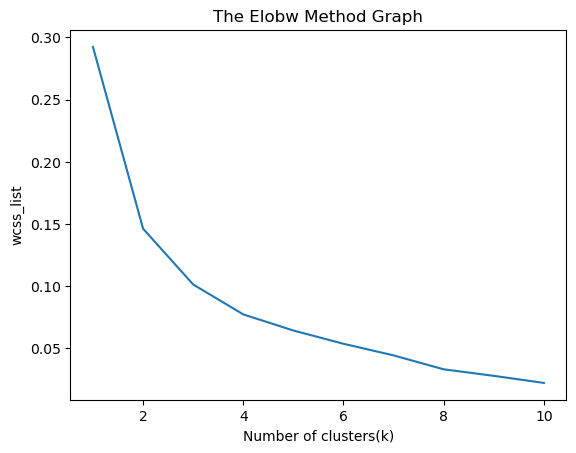

In [121]:
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i)  
    kmeans.fit(norm_movements)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

# Curve at 2 or 4 and since 4 is also confirmed 

In [113]:
from sklearn.metrics import silhouette_score
shs={}
for k in range (2, 10):
    kmeas=KMeans(n_clusters=k).fit(norm_movements)
    labels=kmeas.predict(norm_movements)
    shs[k]=silhouette_score(norm_movements, labels)

/Users/divesh.gandhi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/divesh.gandhi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/divesh.gandhi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/divesh.gandhi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

In [117]:
#Deciding Optimal Number of Clusters:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, max_iter=10000).fit(norm_movements)
labels=kmeans.predict(norm_movements)

/Users/divesh.gandhi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


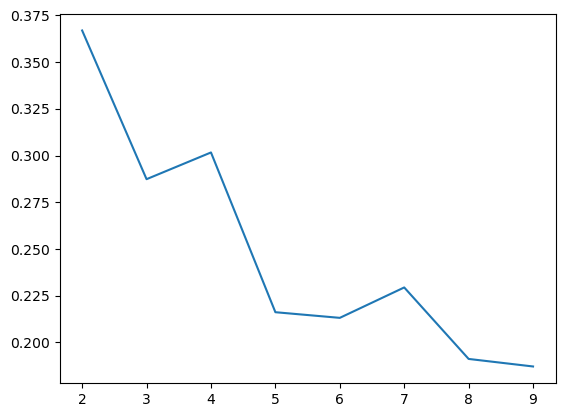

In [118]:
plt.plot(list(shs.keys()), list(shs.values()))

In [128]:
import pandas as pd
df1 = pd.DataFrame({'labels':labels,'companies':list(companies_dict)}).sort_values(by=['labels'],axis = 0)
print(df1)

    labels          companies
16       0   American Express
7        0              Exxon
4        0          Microsoft
5        0             Toyota
6        0              Honda
12       1              Pepsi
11       1    Bank of America
0        1             Amazon
1        1              Apple
15       2         MasterCard
3        2                IBM
8        2            Chevron
9        3      Valero Energy
10       3               Ford
2        3              Intel
13       3          Coca Cola
14       3  Johnson & Johnson
